In [1]:
import matplotlib.pyplot as plt

In [12]:
def read_hex_frames(file_path:str, Byte_num:int, frame_head:str)->list:
    '''读取串口助手保存的txt文件，解析数据帧
    Args:
    ----
        * `file_path`:
        * `Byte_num`: 每帧数据包含的byte数，每个Byte为两个字符
        * `frame_head`: 帧头字符串`A55a`或`5AA5`
    '''
    frames = []
    # 每帧数据包含的字符长度
    str_num = Byte_num*2
    with open(file_path, 'r') as file:
        data = file.read().replace('\n', '').replace(' ', '')  # 读取文件并去除换行符
        
        i = 0
        loss_count = 0
        loss_index = 0
        loss_index_lst = []
        while i < len(data):
            # 查找帧的起始标志
            if data[i:i+4] == frame_head:
                loss_index += 1
                # 帧完整
                if data[i + str_num:i + str_num + 4] == frame_head:
                    frame = data[i:i+str_num] 
                    frames.append(frame)
                    i += str_num  # 跳过当前帧
                # 帧不完整
                else:
                    loss_index_lst.append(loss_index)
                    loss_count += 1
                    i += 1
            else:
                i += 1  # 移动到下一个字符
    print(f"数据总长度：{len(data)//str_num}, 完整帧数：{len(frames)}")
    print(f"丢失数据帧：{loss_index_lst}")
    print(len(loss_index_lst), loss_count)
    return frames

def hex_to_signed(hex_str: str) -> int:
    '''
    将16位有符号数转换为int
    '''
    num = int(hex_str, 16)
    
    # 检查是否为负数（假设使用32位有符号整数）
    if num >= 0x8000:
        num -= 0x10000  # 转换为负数
    
    return num

# 示例
hex_value = "FFFF"  # 16进制数
signed_value = hex_to_signed(hex_value)
print(signed_value)  # 输出: -2

-1


In [13]:
# 使用示例
file_path = r'E:\code\uart_processing_tool\test241217.txt'
hex_frames = read_hex_frames(file_path, 34, '5AA5')
FMG1 = []
FMG2 = []
sEMG1 = []
sEMG2 = []
for frame in hex_frames:
    try:
        FMG1.append(hex_to_signed(frame[4:8]))
        FMG2.append(hex_to_signed(frame[8:12]))
        sEMG1.append(hex_to_signed(frame[12:16]))
        sEMG2.append(hex_to_signed(frame[16:20]))
    except ValueError:
        print(frame)


数据总长度：11470, 完整帧数：11470
丢失数据帧：[11471]
1 1


In [14]:
# 使用示例
file_path = r'E:\code\test/test.txt'
hex_frames = read_hex_frames(file_path)
FMG1 = []
FMG2 = []
sEMG1 = []
sEMG2 = []
for frame in hex_frames:
    try:
        FMG1.append(int(frame[4:8], 16))
        FMG2.append(int(frame[8:12], 16))
        sEMG1.append(int(frame[12:16], 16))
        sEMG2.append(int(frame[16:20], 16))
    except ValueError:
        print(frame)


TypeError: read_hex_frames() missing 2 required positional arguments: 'Byte_num' and 'frame_head'

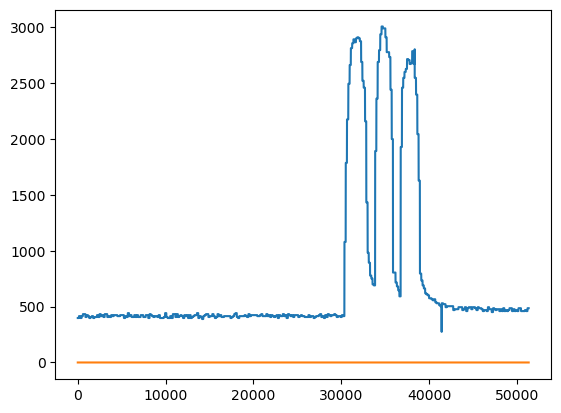

In [ ]:

plt.plot(FMG1)
plt.plot(FMG2)

plt.show()

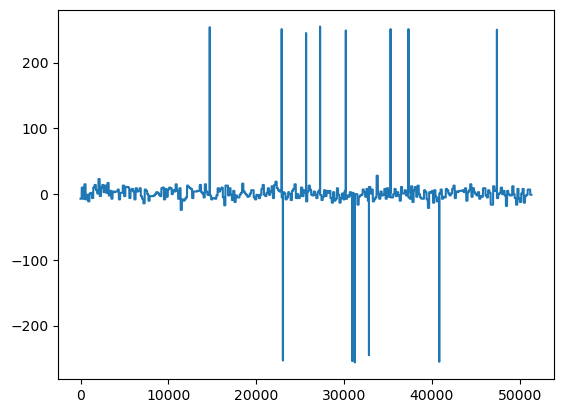

In [ ]:
plt.plot(sEMG1)
#plt.plot(sEMG2)

plt.show()

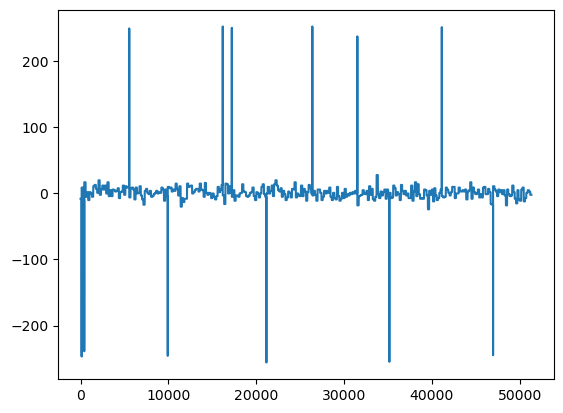

In [ ]:
plt.plot(sEMG2)
#plt.plot(sEMG2)

plt.show()

In [ ]:
from collections import Counter

def top_ten_elements(lst):
    # 统计元素出现次数
    counts = Counter(lst)
    # 获取出现次数前十的元素
    top_ten = counts.most_common(20)
    return top_ten

print(top_ten_elements(FMG2))

[(0, 51339)]


In [ ]:
print(f"FMG1 len: {len(FMG1)}")
print(f"FMG2 len: {len(FMG2)}")

FMG1 len: 51339
FMG2 len: 51339


In [ ]:
print(len(hex_frames))

51339


In [10]:
22*20

440